In [1]:
import pickle
def read_pkl(path):
    with open(path, 'rb') as f:
        data1 = pickle.load(f)
    return data1

path = '/nas/Dataset/Phoenix/phoenix-2014-keypoints.pkl'
data = read_pkl(path)


In [2]:
# Replace with your actual video key
video_key = 'fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute'

# Extract the keypoints data for the selected video
video_data = data[video_key]
keypoints = video_data['keypoints']  # Shape: (176, 133, 3)


In [3]:
video_data

{'keypoints': array([[[109.4   ,  48.53  ,   0.9727],
         [118.    ,  41.22  ,   0.9795],
         [ 99.06  ,  43.    ,   0.985 ],
         ...,
         [101.44  , 243.4   ,   0.828 ],
         [106.6   , 245.8   ,   0.8804],
         [110.1   , 246.6   ,   0.8843]],
 
        [[108.6   ,  47.16  ,   0.966 ],
         [117.9   ,  40.2   ,   0.9604],
         [ 98.7   ,  41.8   ,   0.9736],
         ...,
         [103.    , 239.6   ,   0.842 ],
         [106.8   , 241.5   ,   0.8643],
         [109.25  , 242.2   ,   0.848 ]],
 
        [[108.    ,  46.28  ,   0.9556],
         [117.56  ,  39.7   ,   0.9785],
         [ 98.06  ,  40.66  ,   0.9683],
         ...,
         [ 99.    , 227.6   ,   0.7515],
         [102.1   , 230.5   ,   0.813 ],
         [104.06  , 231.9   ,   0.8125]],
 
        ...,
 
        [[101.75  ,  65.1   ,   0.935 ],
         [110.2   ,  51.34  ,   0.971 ],
         [ 89.9   ,  53.56  ,   0.959 ],
         ...,
         [ 11.14  , 170.    ,   0.8726],
     

In [4]:
keypoints.shape

(176, 133, 3)

In [5]:
keypoints[174][131:134]

array([[ 14.48  , 175.8   ,   0.9136],
       [ 17.12  , 177.8   ,   0.933 ]], dtype=float16)

In [6]:
keypoints[175][131:134]

array([[ 15.75  , 176.    ,   0.913 ],
       [ 18.36  , 177.6   ,   0.9336]], dtype=float16)

In [7]:
len(keypoints[175][0:])

133

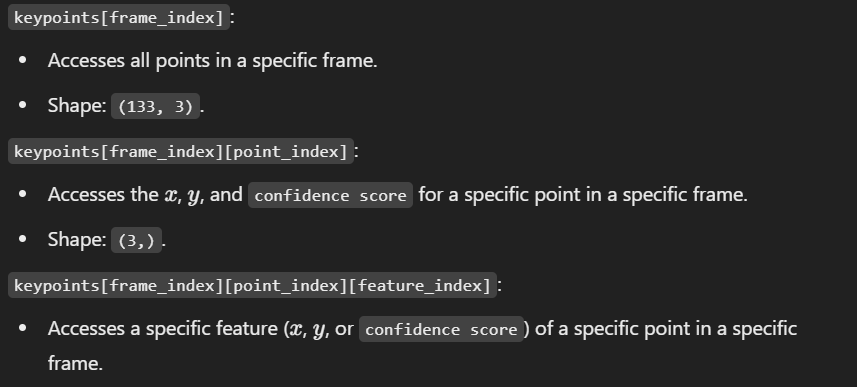

In [8]:
from IPython.display import Image
Image("/nas/Chingiz/sing_language/delta/source.png")  

In [9]:
#frame 131 (actually 132)
keypoints[131][0:5]

array([[ 93.    ,  67.4   ,   0.949 ],
       [103.2   ,  53.5   ,   0.9727],
       [ 85.    ,  55.66  ,   0.9707],
       [120.1   ,  57.4   ,   0.9106],
       [ 78.3   ,  62.2   ,   0.868 ]], dtype=float16)

In [10]:
#frame 132 (actually 133)
keypoints[132][0:5]

array([[ 93.    ,  67.7   ,   0.957 ],
       [103.2   ,  54.53  ,   0.9673],
       [ 84.94  ,  56.6   ,   0.9844],
       [119.9   ,  57.7   ,   0.92  ],
       [ 78.5   ,  62.1   ,   0.8794]], dtype=float16)

In [11]:
# Calculate deltas between consecutive frames
import numpy as np
import pandas as pd

# Simulated keypoints data (frames=176, points=133, features=[X, Y, confidence])
frames = 176
points = 133

deltas = np.array([keypoints[i] - keypoints[i - 1] for i in range(1, frames)]) 

In [12]:
print(keypoints[0][0])
print(keypoints[1][0])
print(keypoints[2][0])
print(keypoints[3][0])
print(keypoints[4][0])
print(keypoints[5][0])
print(keypoints[6][0])
print(keypoints[7][0])

[109.4     48.53     0.9727]
[108.6    47.16    0.966]
[108.      46.28     0.9556]
[107.06   45.56    0.966]
[106.1    45.06    0.977]
[104.75    44.4      0.9546]
[103.1     44.16     0.9688]
[101.3     43.9      0.9775]


In [13]:
print(keypoints[175][90:100])
print(keypoints[174][90:100])

[[ 98.6     82.8      0.964 ]
 [131.5    205.9      0.8877]
 [121.3    200.5      0.818 ]
 [112.75   197.1      0.882 ]
 [105.     196.4      0.838 ]
 [ 99.75   196.9      0.722 ]
 [106.25   209.4      0.846 ]
 [ 98.56   212.2      0.821 ]
 [ 92.3    215.2      0.844 ]
 [ 88.2    218.4      0.8647]]
[[ 98.9     83.25     0.9707]
 [131.8    206.1      0.8936]
 [121.56   200.6      0.8096]
 [112.9    197.1      0.8696]
 [105.1    196.1      0.8486]
 [100.06   196.5      0.7466]
 [106.6    209.5      0.8506]
 [ 99.     212.2      0.832 ]
 [ 92.7    215.2      0.8545]
 [ 88.5    218.5      0.866 ]]


In [14]:
deltas

array([[[-7.5000e-01, -1.3750e+00, -6.8359e-03],
        [-1.2500e-01, -1.0312e+00, -1.9043e-02],
        [-3.7500e-01, -1.1875e+00, -1.1230e-02],
        ...,
        [ 1.5625e+00, -3.7500e+00,  1.3672e-02],
        [ 1.8750e-01, -4.2500e+00, -1.6113e-02],
        [-8.7500e-01, -4.3750e+00, -3.6133e-02]],

       [[-6.2500e-01, -8.7500e-01, -1.0254e-02],
        [-3.1250e-01, -5.0000e-01,  1.8066e-02],
        [-6.2500e-01, -1.1562e+00, -5.3711e-03],
        ...,
        [-4.0000e+00, -1.2000e+01, -9.0332e-02],
        [-4.6875e+00, -1.1000e+01, -5.1270e-02],
        [-5.1875e+00, -1.0375e+01, -3.5645e-02]],

       [[-9.3750e-01, -7.1875e-01,  1.0254e-02],
        [-7.5000e-01, -2.1875e-01, -2.2949e-02],
        [-3.1250e-01, -9.0625e-01, -4.8828e-03],
        ...,
        [ 1.3125e+00, -2.3375e+01, -8.4961e-02],
        [ 7.5000e-01, -2.5500e+01, -1.2354e-01],
        [ 6.2500e-02, -2.6500e+01, -1.6846e-01]],

       ...,

       [[-1.2500e-01,  3.1250e-01, -1.8066e-02],
        [-6

In [ ]:
#Add a zero frame
zero_frame = np.zeros((1, points, 3))  # Shape: (1, 133, 3)
deltas_with_zero = np.vstack((zero_frame, deltas))  # Shape: (176, 133, 3)

#Save the data in the original format
output_data = {'keypoints': deltas_with_zero}

# Step 4: Save as a pickle file
with open("/nas/Chingiz/sing_language/delta/deltas.pkl", "wb") as f:
    pickle.dump(deltas, f)

print("Delta values saved successfully in the original format.")

Delta values saved successfully in the original format.


In [16]:
def quantize(value, threshold=0.3):
    if value >= threshold:
        return 1
    elif value <= -threshold:
        return -1
    else:
        return 0

In [17]:
quantized_deltas = np.vectorize(quantize)(deltas)

In [18]:
quantized_deltas

array([[[-1, -1,  0],
        [ 0, -1,  0],
        [-1, -1,  0],
        ...,
        [ 1, -1,  0],
        [ 0, -1,  0],
        [-1, -1,  0]],

       [[-1, -1,  0],
        [-1, -1,  0],
        [-1, -1,  0],
        ...,
        [-1, -1,  0],
        [-1, -1,  0],
        [-1, -1,  0]],

       [[-1, -1,  0],
        [-1,  0,  0],
        [-1, -1,  0],
        ...,
        [ 1, -1,  0],
        [ 1, -1,  0],
        [ 0, -1,  0]],

       ...,

       [[ 0,  1,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 1,  1,  0],
        [ 1,  1,  0],
        [ 1,  1,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 1,  1,  0],
        [ 1,  1,  0],
        [ 1,  1,  0]],

       [[ 0,  0,  0],
        [-1,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 1,  1,  0],
        [ 1,  0,  0],
        [ 1,  0,  0]]])

In [19]:
quantized_deltas = quantized_deltas.astype(int)

In [20]:
# Add a zero frame
zero_frame = np.zeros((1, points, 3), dtype=int)  # Create a zero frame with shape (1, 133, 3)
quantized_deltas_with_zero = np.vstack((zero_frame, quantized_deltas))  # Shape: (176, 133, 3)

In [21]:
# Save the data in the original structure
output_data = {'keypoints': quantized_deltas_with_zero}


In [22]:
# Save to a file (e.g., pickle)
with open("/nas/Chingiz/sing_language/vector/quantized_deltas.pkl", "wb") as f:
    pickle.dump(output_data, f)

print("Data saved successfully.")

Data saved successfully.


In [23]:
def read_pkl(path):
    with open(path, 'rb') as f:
        data1 = pickle.load(f)
    return data1

path = '/nas/Chingiz/sing_language/vector/quantized_deltas.pkl'
data_vector = read_pkl(path)

In [24]:
data_vector

{'keypoints': array([[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        [[-1, -1,  0],
         [ 0, -1,  0],
         [-1, -1,  0],
         ...,
         [ 1, -1,  0],
         [ 0, -1,  0],
         [-1, -1,  0]],
 
        [[-1, -1,  0],
         [-1, -1,  0],
         [-1, -1,  0],
         ...,
         [-1, -1,  0],
         [-1, -1,  0],
         [-1, -1,  0]],
 
        ...,
 
        [[ 0,  1,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 1,  1,  0],
         [ 1,  1,  0],
         [ 1,  1,  0]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 1,  1,  0],
         [ 1,  1,  0],
         [ 1,  1,  0]],
 
        [[ 0,  0,  0],
         [-1,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 1,  1,  0],
         [ 1,  0,  0],
         [ 1,  0,  0]]])}

In [25]:
data_vector.keys()

dict_keys(['keypoints'])

In [ ]:
# example video (first), last frame(176), points from 91 to 110.
data_vector["keypoints"][175][40:70]

array([[ 0, -1,  0],
       [ 0,  0,  0],
       [ 0,  0,  0],
       [ 0,  0,  0],
       [ 0,  0,  0],
       [-1,  1,  0],
       [-1,  0,  0],
       [-1,  0,  0],
       [-1,  0,  0],
       [-1,  0,  0],
       [-1,  0,  0],
       [-1,  0,  0],
       [-1,  0,  0],
       [ 0,  0,  0],
       [-1,  0,  0],
       [-1,  0,  0],
       [-1,  0,  0],
       [-1,  0,  0],
       [-1,  0,  0],
       [-1,  0,  0]])

In [27]:
# video key
video_key = 'keypoints'

# # Extract the keypoints data 
# video_data = data_vector[video_key]
keypoints = data_vector['keypoints']  # Shape: (176, 133, 3)